# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from config import pyowm_Key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
clmNames = ['City', 'Country']
cityDF = pd.DataFrame(columns=clmNames)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
# create DataFrame from cities
ctyData = pd.DataFrame({'City':cities})
ctyData.head()

,City
0,rikitea
1,tromso
2,dikson
3,bengkulu
4,hamilton


In [4]:
# Open weather Url creations
url = 'http://api.openweathermap.org/data/2.5/weather?'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Empty List for Data Storage from API call
cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

dtaColmn = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']
dfCity = pd.DataFrame(columns=dtaColmn)

# Counter start
rowCnt = 1

# print first line of code
print('Beginning Data Retrieval\n-------------------------------')
# converted to an If statement 
for index, row in ctyData.iterrows():
    rowCnt += 1
    owmUrl = url + 'appid=' + pyowm_Key + '&units=IMPERIAL' +  '&q=' + row['City']
    cityDF = requests.get(owmUrl).json()
#     print(cityDF)
    if cityDF['cod'] == '404':
        print('City not found Skipping...')
    else:
        response = cityDF
        cityName.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        cityRcrd = response['name']
        print(f'Processing Record {rowCnt} | {cityRcrd}')

# Try and Except was not working above code works.
#         dfCity.set_value(index, 'City', cityDF['name'])
#         dfCity.set_value(index, 'Cloudiness', cityDF['clouds']['all'])
#         dfCity.set_value(index, 'Country', cityDF['sys']['country'])
#         dfCity.set_value(index, 'Date', cityDF['dt'])
#         dfCity.set_value(index, 'Humidity', cityDF['main']['humidity'])
#         dfCity.set_value(index, 'Lat', cityDF['coord']['lat'])
#         dfCity.set_value(index, 'Lon', cityDF['coord']['lon'])
#         dfCity.set_value(index, 'Max Temp', cityDF['main']['temp_max'])
#         dfCity.set_value(index, 'Wind Speed', cityDF['wind']['speed'])
        
#         rowCnt = rowCnt + 1
        
#         time.sleep(1.01)
#     except:
#         print('City not found Skipping...')
#     continue

Beginning Data Retrieval
-------------------------------
Processing Record 2 | Rikitea
Processing Record 3 | Tromso
Processing Record 4 | Dikson
City not found Skipping...
Processing Record 6 | Hamilton
Processing Record 7 | Gaeta
Processing Record 8 | Albany
Processing Record 9 | Norman Wells
Processing Record 10 | Kiunga
Processing Record 11 | Busselton
Processing Record 12 | Tuatapere
Processing Record 13 | Avarua
Processing Record 14 | Teya
City not found Skipping...
City not found Skipping...
Processing Record 17 | Fare
Processing Record 18 | Flin Flon
Processing Record 19 | Tiznit
Processing Record 20 | Port-Cartier
Processing Record 21 | Yulara
Processing Record 22 | Champerico
Processing Record 23 | Rocha
Processing Record 24 | Abu Dhabi
Processing Record 25 | Souillac
Processing Record 26 | Cidreira
Processing Record 27 | Ponta do Sol
Processing Record 28 | Constitucion
Processing Record 29 | Maniitsoq
Processing Record 30 | Cape Town
Processing Record 31 | Bredasdorp
Processi

Processing Record 252 | Maraba
Processing Record 253 | Nalut
Processing Record 254 | Lata
Processing Record 255 | Waingapu
Processing Record 256 | Zhezkazgan
Processing Record 257 | Porecatu
Processing Record 258 | Youghal
Processing Record 259 | Kilembe
Processing Record 260 | Kuopio
Processing Record 261 | Synya
Processing Record 262 | Ribeira Grande
Processing Record 263 | Twentynine Palms
Processing Record 264 | Razole
Processing Record 265 | Wangkui
Processing Record 266 | Te Anau
Processing Record 267 | Vao
Processing Record 268 | Mandera
Processing Record 269 | Energetik
Processing Record 270 | Paita
Processing Record 271 | Khalki
City not found Skipping...
Processing Record 273 | Aksu
Processing Record 274 | Castro
Processing Record 275 | Srednekolymsk
Processing Record 276 | Tutoia
Processing Record 277 | Bethel
Processing Record 278 | Ganzhou
Processing Record 279 | Ornskoldsvik
Processing Record 280 | Falavarjan
City not found Skipping...
Processing Record 282 | Ormara
Proce

Processing Record 505 | Sugod
City not found Skipping...
Processing Record 507 | Dulce Nombre de Culmi
Processing Record 508 | Gondanglegi
Processing Record 509 | Bom Jesus
Processing Record 510 | Kalachinsk
Processing Record 511 | Anloga
Processing Record 512 | Lesnoye
Processing Record 513 | Kijang
Processing Record 514 | Juneau
Processing Record 515 | Akdepe
Processing Record 516 | Westport
Processing Record 517 | Sibolga
Processing Record 518 | Guane
City not found Skipping...
Processing Record 520 | Aljezur
Processing Record 521 | Saquarema
City not found Skipping...
Processing Record 523 | Aginskoye
Processing Record 524 | Egvekinot
Processing Record 525 | Shar
Processing Record 526 | Dingli
City not found Skipping...
Processing Record 528 | Eenhana
Processing Record 529 | Hovd
Processing Record 530 | Requena
Processing Record 531 | Indramayu
Processing Record 532 | Strezhevoy
Processing Record 533 | Aklavik
Processing Record 534 | Polovinnoye
Processing Record 535 | Tilichiki
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
wthrDic = {
    'City':cityName, 
    'Cloudiness':cloudiness, 
    'COuntry':country, 
    'Date':date, 
    'Humidity':humidity, 
    'Lat':lat, 
    'Lng':lng, 
    'Max Temp':maxTemp, 
    'Wind Speed':windSpeed
}

# Data Frame from Dict
wthrDF = pd.DataFrame(wthrDic)

# Data frame count
wthrDF.count()

City          564
Cloudiness    564
COuntry       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [7]:
wthrDF.to_csv(output_data_file)
wthrDF.head()

,City,Cloudiness,COuntry,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,56,PF,1553237931,97,-23.12,-134.97,79.33,18.37
1,Tromso,75,NO,1553237982,84,69.65,18.96,32.00,12.75
2,Dikson,0,RU,1553237963,100,73.51,80.55,2.29,10.54
3,Hamilton,90,CA,1553237923,99,43.26,-79.87,39.99,6.93
4,Gaeta,0,IT,1553238079,66,41.22,13.56,60.01,10.29


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

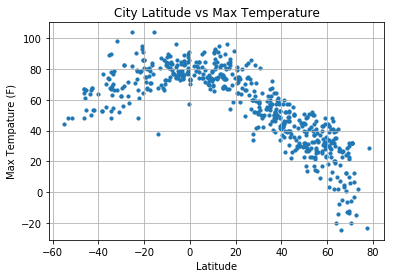

In [8]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Max Temp'], marker='o', s=10)

# grap Lables
plt.title('City Latitude vs Max Temperature')
plt.ylabel('Max Tempature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('MaxTemp_Lat.png')
# plot figure
plt.show()

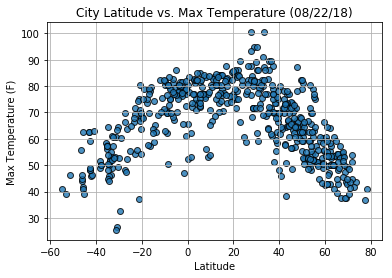

#### Latitude vs. Humidity Plot

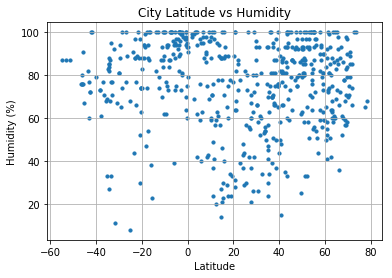

In [9]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Humidity'], marker='o', s=10)

# grap Lables
plt.title('City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_Humidity.png')
# plot figure
plt.show()

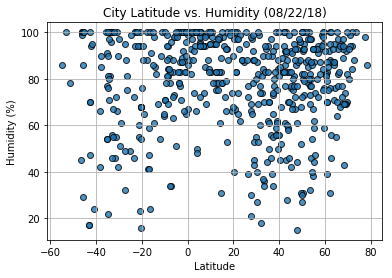

#### Latitude vs. Cloudiness Plot

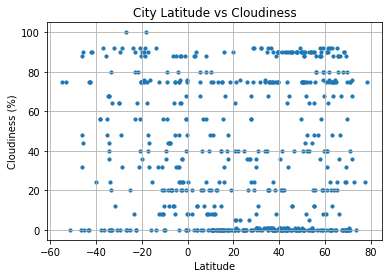

In [10]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Cloudiness'], marker='o', s=10)

# grap Lables
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_Cloudiness.png')
# plot figure
plt.show()

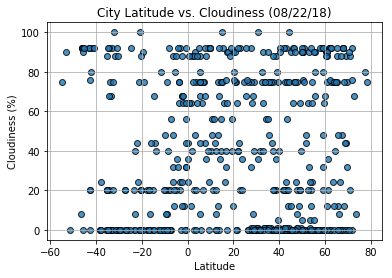

#### Latitude vs. Wind Speed Plot

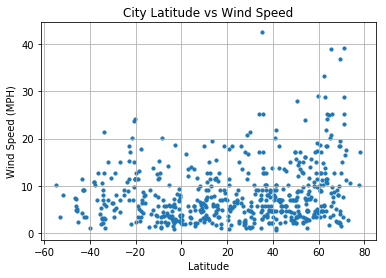

In [11]:
# Scatter plot for Lat vs Temp
plt.scatter(wthrDF['Lat'], wthrDF['Wind Speed'], marker='o', s=10)

# grap Lables
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# create figures and export file
plt.savefig('Lat_WindSpeed.png')
# plot figure
plt.show()

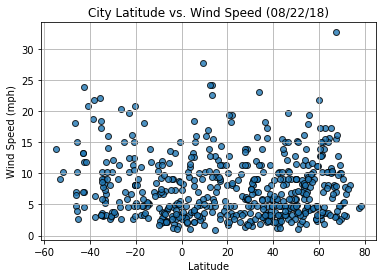